# Import libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from textstat import flesch_reading_ease
from collections import Counter
from scipy.stats import pearsonr
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from scipy.stats import mannwhitneyu
import matplotlib.dates as mdates
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
import string
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.utils import resample
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elora\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Exploratory Data Analysis

 Data Overview

In [47]:
politics_data = pd.read_csv('cleaned_politics_data.csv')
politics_data.head()

,title,text,subject,date,label
0,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",Politics,2018-02-19,0
1,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,Politics,2018-02-19,0
2,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,Politics,2018-02-19,0
3,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,Politics,2018-02-18,0
4,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,Politics,2018-02-18,0


In [48]:
print(politics_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18113 entries, 0 to 18112
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    18113 non-null  object
 1   text     18113 non-null  object
 2   subject  18113 non-null  object
 3   date     18108 non-null  object
 4   label    18113 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 707.7+ KB
None


In [49]:
# Convert the 'date' column to datetime format
politics_data['date'] = pd.to_datetime(politics_data['date'], errors='coerce')

# Drop rows with missing 'date' values
politics_data_cleaned = politics_data.dropna(subset=['date'])

# Verify
print(politics_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18108 entries, 0 to 18112
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    18108 non-null  object        
 1   text     18108 non-null  object        
 2   subject  18108 non-null  object        
 3   date     18108 non-null  datetime64[ns]
 4   label    18108 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 848.8+ KB
None


Label Distribution

label
1    11272
0     6841
Name: count, dtype: int64


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


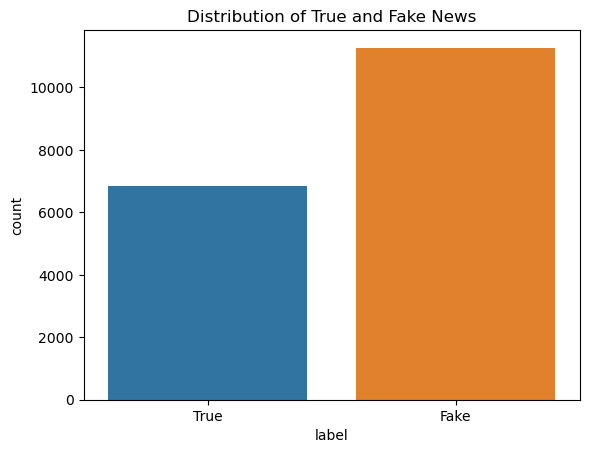

In [50]:
# Count of each label
label_counts = politics_data['label'].value_counts()
print(label_counts)

sns.countplot(x='label', data=politics_data)
plt.title('Distribution of True and Fake News')
plt.xticks([0, 1], ['True', 'Fake'])
plt.show()

Text Data Analysis

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

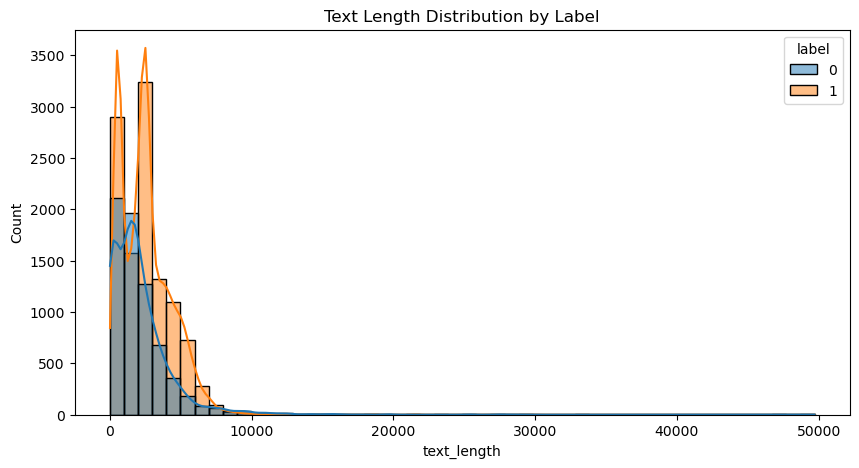

In [51]:
# Add a new column for text length
politics_data['text_length'] = politics_data['text'].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(10, 5))
sns.histplot(data=politics_data, x='text_length', hue='label', bins=50, kde=True)
plt.title('Text Length Distribution by Label')
plt.show()

 Most Common Words and N-grams

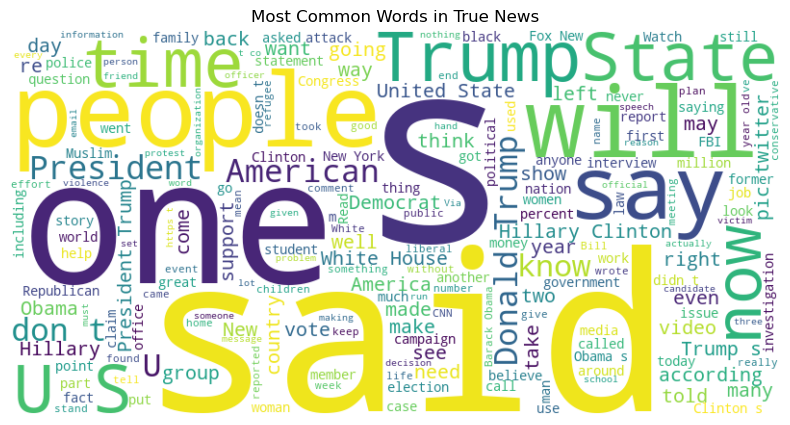

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


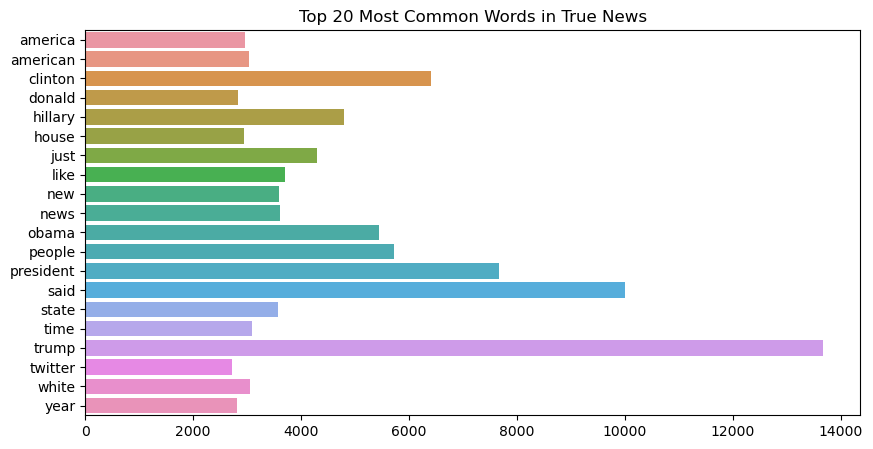

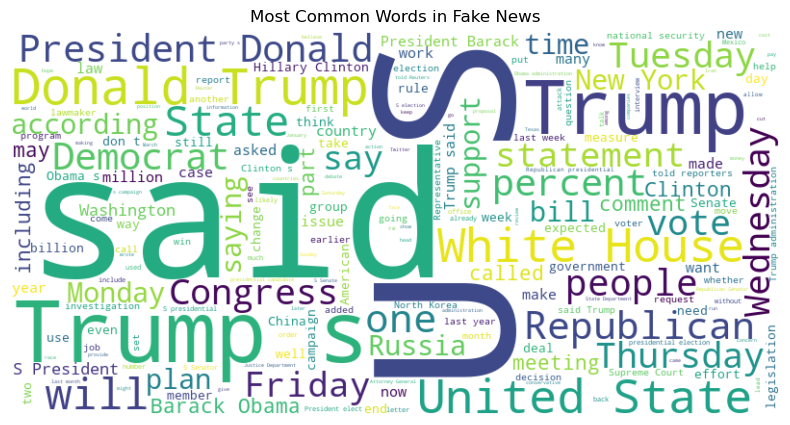

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


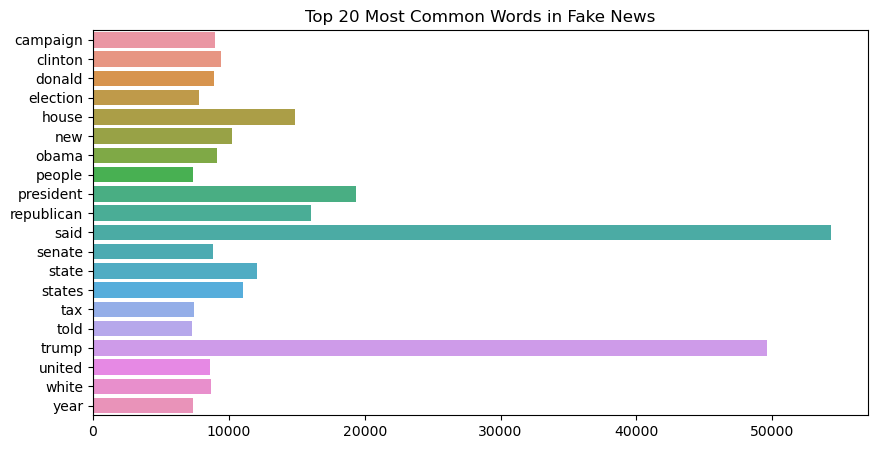

In [52]:
def plot_most_common_words(data, label, n_words=20):
    subset = data[data['label'] == label]
    text_data = ' '.join(subset['text'].tolist())
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {"True" if label == 0 else "Fake"} News')
    plt.show()
    
    # Most common words
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    word_counts = vectorizer.fit_transform(subset['text'])
    words = vectorizer.get_feature_names_out()
    counts = word_counts.sum(axis=0).A1
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts, y=words)
    plt.title(f'Top {n_words} Most Common Words in {"True" if label == 0 else "Fake"} News')
    plt.show()

# Plot for True News
plot_most_common_words(politics_data, label=0)

# Plot for Fake News
plot_most_common_words(politics_data, label=1)

Sentiment Analysis

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

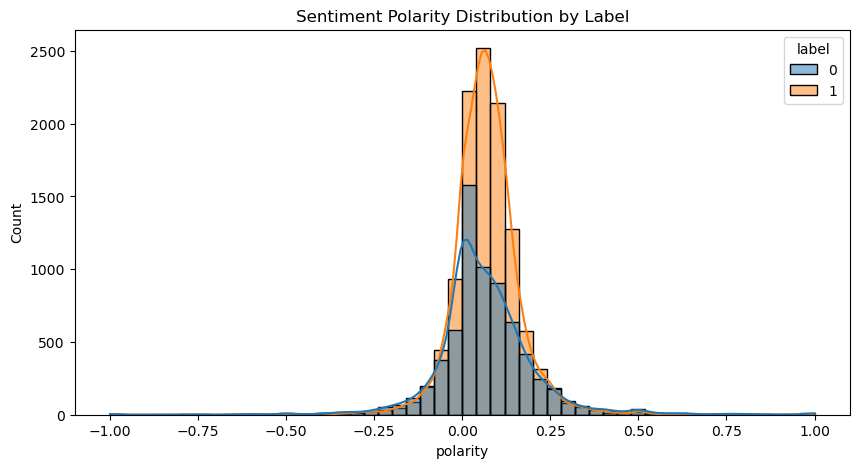

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

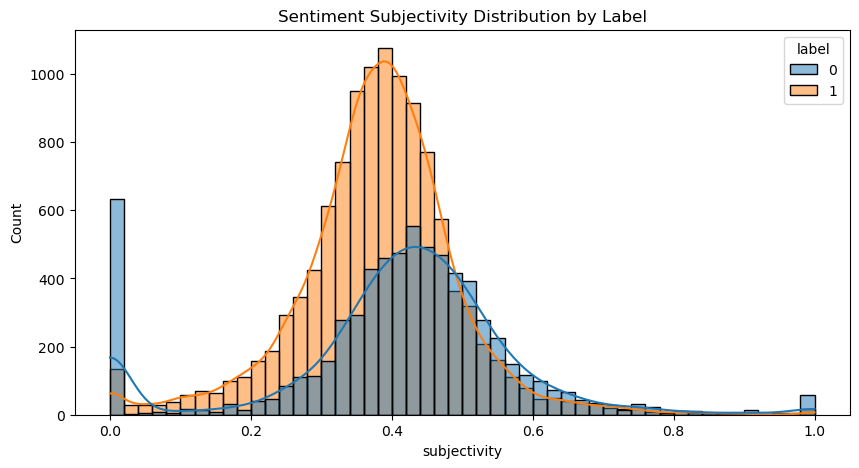

In [53]:
# Add sentiment columns
politics_data['polarity'] = politics_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
politics_data['subjectivity'] = politics_data['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=politics_data, x='polarity', hue='label', bins=50, kde=True)
plt.title('Sentiment Polarity Distribution by Label')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=politics_data, x='subjectivity', hue='label', bins=50, kde=True)
plt.title('Sentiment Subjectivity Distribution by Label')
plt.show()

In [54]:
"""
Polarity measures the sentiment of the text and ranges from -1 to 1.
-1: Very negative sentiment.
0: Neutral sentiment.
1: Very positive sentiment.
A higher positive polarity indicates a more positive sentiment, while a higher negative polarity indicates a more negative sentiment.

Subjectivity measures how subjective or opinionated the text is and ranges from 0 to 1.
0: Very objective (factual and less opinionated).
1: Very subjective (more opinionated and personal).
Higher subjectivity means the text contains more personal opinions and subjective statements, whereas lower subjectivity means it is more objective and factual.

"""

'\nPolarity measures the sentiment of the text and ranges from -1 to 1.\n-1: Very negative sentiment.\n0: Neutral sentiment.\n1: Very positive sentiment.\nA higher positive polarity indicates a more positive sentiment, while a higher negative polarity indicates a more negative sentiment.\n\nSubjectivity measures how subjective or opinionated the text is and ranges from 0 to 1.\n0: Very objective (factual and less opinionated).\n1: Very subjective (more opinionated and personal).\nHigher subjectivity means the text contains more personal opinions and subjective statements, whereas lower subjectivity means it is more objective and factual.\n\n'

Correlation Analysis

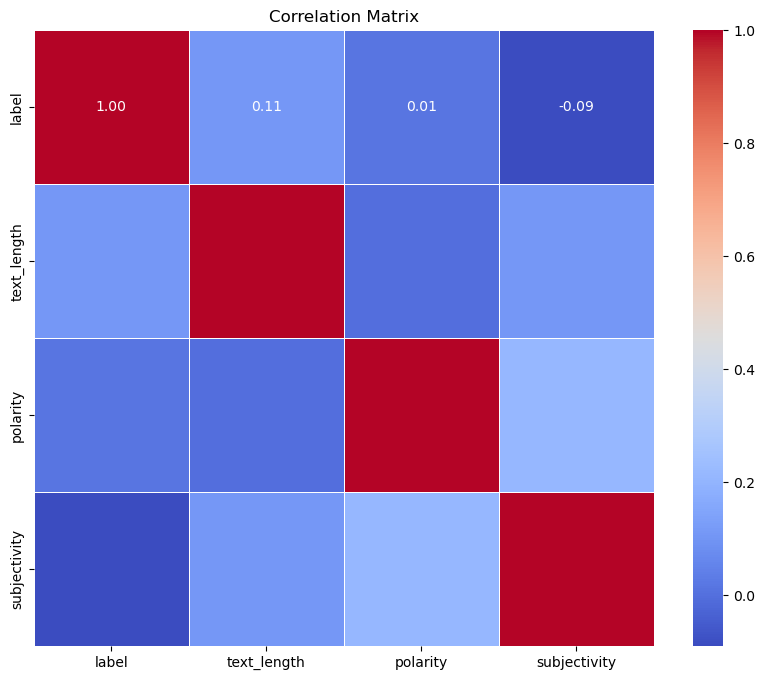

In [55]:
# Select only numeric columns for correlation matrix
numeric_data = politics_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [56]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,label,text_length,polarity,subjectivity
label,1.000000,0.106983,0.014511,-0.090273
text_length,0.106983,1.000000,-0.004945,0.107823
polarity,0.014511,-0.004945,1.000000,0.210927
subjectivity,-0.090273,0.107823,0.210927,1.000000


In [57]:
"""
Label vs. Text Length:
There's a weak positive correlation between the label and text_length. This means that articles labeled as "Fake" or "True" tend to have a slight tendency to be of different lengths, but the relationship is not strong.

Label vs. Polarity:
There's a very weak positive correlation between label and polarity. Polarity measures the sentiment of the text (from negative to positive), and this correlation suggests that the sentiment of the articles does not significantly differentiate between "Fake" and "True" news.

Label vs. Subjectivity:
There's a weak negative correlation between label and subjectivity. Subjectivity measures how subjective the text is (from objective to subjective). This indicates that subjective texts tend to be slightly more likely to be labeled as "Fake", but the relationship is weak.

Text Length vs. Polarity:
There's an almost negligible correlation between text_length and polarity. This suggests that the length of the text doesn’t significantly affect its sentiment.

Text Length vs. Subjectivity:
There's a weak positive correlation between text_length and subjectivity. This means that longer texts tend to be slightly more subjective, though the relationship is weak.

Polarity vs. Subjectivity:
There’s a moderate positive correlation between polarity and subjectivity. This suggests that more subjective texts tend to have a more extreme sentiment (either more positive or negative).
"""

'\nLabel vs. Text Length:\nThere\'s a weak positive correlation between the label and text_length. This means that articles labeled as "Fake" or "True" tend to have a slight tendency to be of different lengths, but the relationship is not strong.\n\nLabel vs. Polarity:\nThere\'s a very weak positive correlation between label and polarity. Polarity measures the sentiment of the text (from negative to positive), and this correlation suggests that the sentiment of the articles does not significantly differentiate between "Fake" and "True" news.\n\nLabel vs. Subjectivity:\nThere\'s a weak negative correlation between label and subjectivity. Subjectivity measures how subjective the text is (from objective to subjective). This indicates that subjective texts tend to be slightly more likely to be labeled as "Fake", but the relationship is weak.\n\nText Length vs. Polarity:\nThere\'s an almost negligible correlation between text_length and polarity. This suggests that the length of the text do

In [58]:
politics_data.head()

,title,text,subject,date,label,text_length,polarity,subjectivity
0,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",Politics,2018-02-19,0,1066,0.154604,0.458855
1,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,Politics,2018-02-19,0,1335,-0.113194,0.370833
2,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,Politics,2018-02-19,0,749,0.171429,0.571429
3,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,Politics,2018-02-18,0,1051,0.117187,0.333854
4,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,Politics,2018-02-18,0,1234,-0.015909,0.431061


In [59]:
politics_data[['text_length', 'polarity', 'subjectivity']].describe()

,text_length,polarity,subjectivity
count,18113.000000,18113.000000,18113.000000
mean,2360.819080,0.067599,0.390268
std,1988.767695,0.117781,0.143135
min,1.000000,-1.000000,0.000000
25%,816.000000,0.004251,0.331987
50%,2112.000000,0.062046,0.398148
75%,3216.000000,0.118182,0.463008
max,49705.000000,1.000000,1.000000


# Hypothesis

Sentiment Analysis Hypothesis

Hypothesis 1: Difference in Polarity

Null Hypothesis: There is no significant difference in sentiment polarity between true and fake political news articles.

Alternative Hypothesis: There is a significant difference in sentiment polarity between true and fake political news articles.

In [60]:
# Separate the data into true and fake
true_articles = politics_data[politics_data['label'] == 0]
fake_articles = politics_data[politics_data['label'] == 1]

# Perform t-test on polarity
t_stat, p_value = ttest_ind(true_articles['polarity'], fake_articles['polarity'], equal_var=False)
print(f"Polarity T-test: t-statistic = {t_stat}, p-value = {p_value}")

Polarity T-test: t-statistic = -1.7572605460537045, p-value = 0.0789034502825092


In [61]:
"""
With a p-value of 0.079, which is greater than the common significance level of
0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in sentiment polarity between true and fake news articles based on this test.
"""

'\nWith a p-value of 0.079, which is greater than the common significance level of\n0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in sentiment polarity between true and fake news articles based on this test.\n'

Hypothesis 2: Difference in Subjectivity

Null Hypothesis (H0): There is no significant difference in sentiment subjectivity between true and fake political news articles.

Alternative Hypothesis (H1): There is a significant difference in sentiment subjectivity between true and fake political news articles.

In [62]:
# Perform t-test on subjectivity
t_stat, p_value = ttest_ind(true_articles['subjectivity'], fake_articles['subjectivity'], equal_var=False)
print(f"Subjectivity T-test: t-statistic = {t_stat}, p-value = {p_value}")

Subjectivity T-test: t-statistic = 11.076519125903099, p-value = 2.3417753746373225e-28


In [63]:
"""
With such a tiny p-value (2.34e-28), which is far below the common significance 
threshold of 0.05, we reject the null hypothesis. This means there is a statistically significant difference in subjectivity between true and fake news articles.
"""

'\nWith such a tiny p-value (2.34e-28), which is far below the common significance \nthreshold of 0.05, we reject the null hypothesis. This means there is a statistically significant difference in subjectivity between true and fake news articles.\n'

Text Length Hypothesis

Hypothesis 3: Difference in Text Length

Null Hypothesis (H0): There is no significant difference in text length between true and fake political news articles.

Alternative Hypothesis (H1): There is a significant difference in text length between true and fake political news articles.

In [64]:
# Perform t-test on text length
t_stat, p_value = ttest_ind(true_articles['text_length'], fake_articles['text_length'], equal_var=False)
print(f"Text Length T-test: t-statistic = {t_stat}, p-value = {p_value}")

Text Length T-test: t-statistic = -13.672830383514015, p-value = 3.0689435707929616e-42


Temporal Trends Hypothesis

Hypothesis 4: Frequency Over Time

Null Hypothesis (H0): The frequency of true and fake political news articles is not significantly different over time.

Alternative Hypothesis (H1): The frequency of true and fake political news articles is significantly different over time.

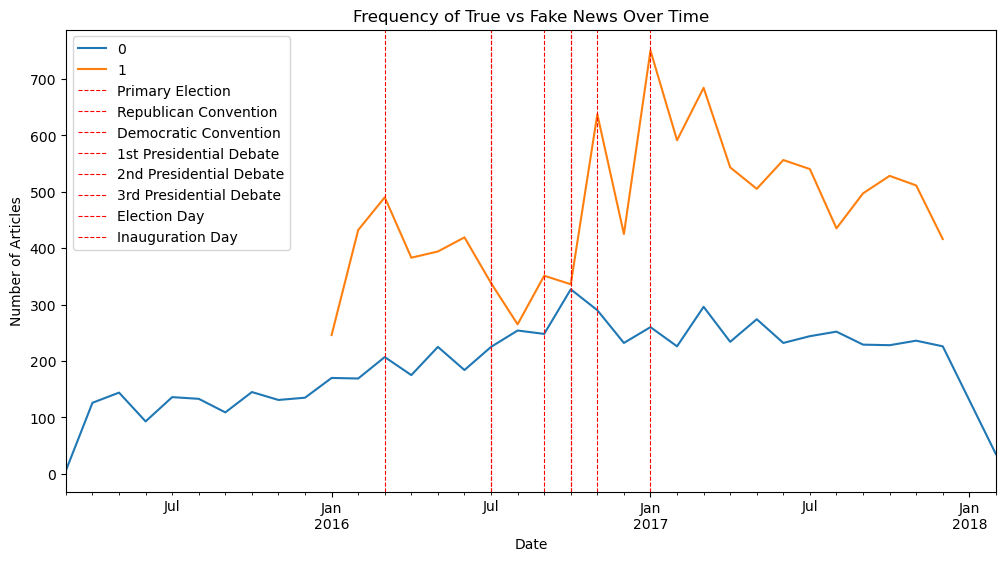

In [65]:
plt.figure(figsize=(12, 6))

# Group by month and 'label' to plot frequency over time
politics_data.groupby([politics_data['date'].dt.to_period('M'), 'label']).size().unstack().plot(ax=plt.gca())

# Title and labels
plt.title('Frequency of True vs Fake News Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# Custom legend labels for clarity
plt.legend(['True News (Blue)', 'Fake News (Orange)'])

# Overlay key political events 
key_dates = {
    'Primary Election': '2016-03-01',
    'Republican Convention': '2016-07-18',
    'Democratic Convention': '2016-07-25',
    '1st Presidential Debate': '2016-09-26',
    '2nd Presidential Debate': '2016-10-09',
    '3rd Presidential Debate': '2016-10-19',
    'Election Day': '2016-11-08',
    'Inauguration Day': '2017-01-20'
}

# Add vertical lines for each key event
for event, date in key_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=0.8, label=event)

# Prevent duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

In [66]:
"""
Spike Around Mid-2016 to Late 2016: The graph shows a noticeable increase in fake news articles around key political events, 
such as the Republican and Democratic Conventions in July, the three Presidential Debates in September and October, 
and Election Day in November 2016. This supports the hypothesis that the frequency of fake news increases significantly 
around major political events.
Post-Election Decline: After the election in November 2016, there is a noticeable decline in the frequency of fake news 
articles, although it still remains higher than the frequency of true news articles.

Significant Peaks in January and February 2017:
There is another peak in fake news frequency in late January to early February 2017. This corresponds with a number of 
significant events:
-January 20, 2017: Inauguration of Donald Trump as the 45th President of the United States. This event likely generated a lot 
of media coverage and could have been a catalyst for fake news proliferation, particularly regarding policy changes, protests, 
and controversies surrounding the new administration.
-January 2017: Several executive orders were issued by the new administration, including the controversial "travel ban" 
targeting several Muslim-majority countries. This caused significant public outcry, protests, and legal battles, potentially 
spurring more fake news.
Mid to Late February 2017: Continued political discourse around the new administration's policies, the early actions of the 
Trump administration, and further executive orders may have contributed to this peak.
"""

'\nSpike Around Mid-2016 to Late 2016: The graph shows a noticeable increase in fake news articles around key political events, \nsuch as the Republican and Democratic Conventions in July, the three Presidential Debates in September and October, \nand Election Day in November 2016. This supports the hypothesis that the frequency of fake news increases significantly \naround major political events.\nPost-Election Decline: After the election in November 2016, there is a noticeable decline in the frequency of fake news \narticles, although it still remains higher than the frequency of true news articles.\n\nSignificant Peaks in January and February 2017:\nThere is another peak in fake news frequency in late January to early February 2017. This corresponds with a number of \nsignificant events:\n-January 20, 2017: Inauguration of Donald Trump as the 45th President of the United States. This event likely generated a lot \nof media coverage and could have been a catalyst for fake news prolif

Correlation Between Sentiment and Fake News

Hypothesis 5: Correlation

Null Hypothesis (H0): There is no significant correlation between sentiment scores (polarity and subjectivity) and the likelihood of an article being fake.

Alternative Hypothesis (H1): There is a significant correlation between sentiment scores (polarity and subjectivity) and the likelihood of an article being fake.

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

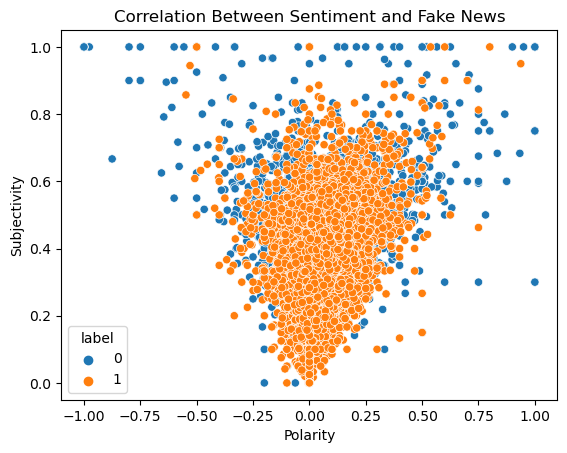

In [67]:
# Plot the corr between sentiment and label
sns.scatterplot(data=politics_data, x='polarity', y='subjectivity', hue='label')
plt.title('Correlation Between Sentiment and Fake News')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Hypothesis 6: Difference in Emotional Tone

Null Hypothesis (H0): There is no significant difference in the emotional tone (positive, negative, neutral) between true and fake news articles.

Alternative Hypothesis (H1): There is a significant difference in the emotional tone (positive, negative, neutral) between true and fake news articles.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elora\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Sentiment: U-statistic = 38542948.0, p-value = 0.9697704911915572
Negative Sentiment: U-statistic = 31383527.5, p-value = 3.181976087518464e-98
Neutral Sentiment: U-statistic = 51632402.0, p-value = 0.0


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

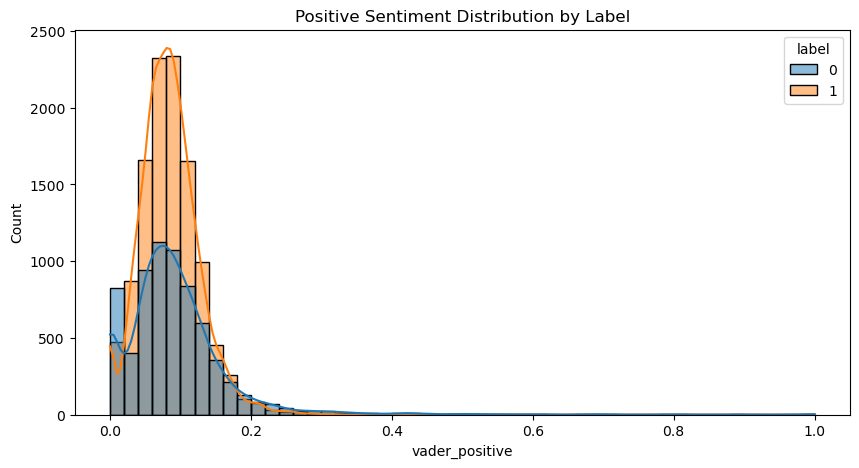

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

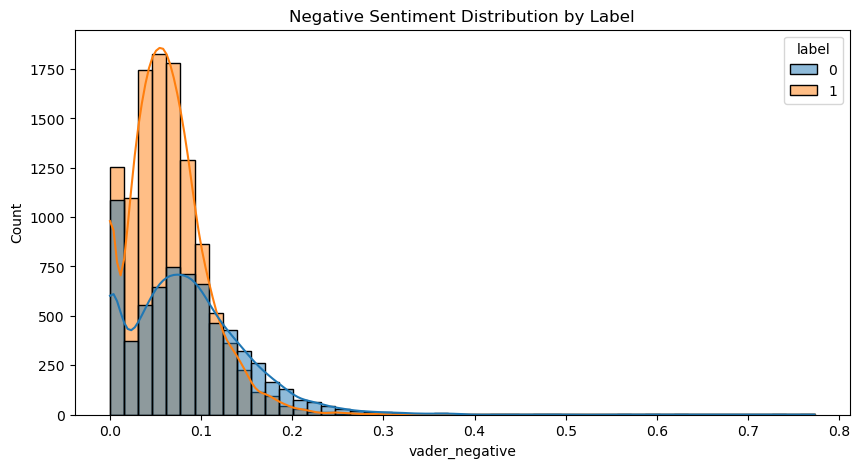

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

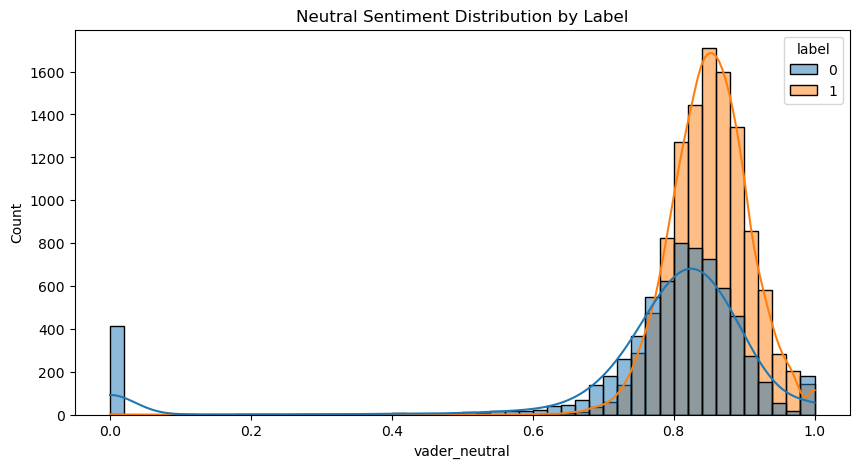

In [68]:
# Download the necessary NLTK data
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER to calculate emotional tones
politics_data['vader_sentiment'] = politics_data['text'].apply(lambda x: sia.polarity_scores(x))

# Separate out the different components 
politics_data['vader_positive'] = politics_data['vader_sentiment'].apply(lambda x: x['pos'])
politics_data['vader_negative'] = politics_data['vader_sentiment'].apply(lambda x: x['neg'])
politics_data['vader_neutral'] = politics_data['vader_sentiment'].apply(lambda x: x['neu'])
politics_data['vader_compound'] = politics_data['vader_sentiment'].apply(lambda x: x['compound'])

# Separate fake and true news articles
fake_news = politics_data[politics_data['label'] == 1]
true_news = politics_data[politics_data['label'] == 0]

# Perform Mann-Whitney U test for positive sentiment
u_statistic_pos, p_value_pos = mannwhitneyu(fake_news['vader_positive'], true_news['vader_positive'], alternative='two-sided')

# Mann-Whitney U test for negative sentiment
u_statistic_neg, p_value_neg = mannwhitneyu(fake_news['vader_negative'], true_news['vader_negative'], alternative='two-sided')

# Mann-Whitney U test for neutral sentiment
u_statistic_neu, p_value_neu = mannwhitneyu(fake_news['vader_neutral'], true_news['vader_neutral'], alternative='two-sided')

# Results
print(f"Positive Sentiment: U-statistic = {u_statistic_pos}, p-value = {p_value_pos}")
print(f"Negative Sentiment: U-statistic = {u_statistic_neg}, p-value = {p_value_neg}")
print(f"Neutral Sentiment: U-statistic = {u_statistic_neu}, p-value = {p_value_neu}")

# Visualize emotional tone distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=politics_data, x='vader_positive', hue='label', bins=50, kde=True)
plt.title('Positive Sentiment Distribution by Label')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=politics_data, x='vader_negative', hue='label', bins=50, kde=True)
plt.title('Negative Sentiment Distribution by Label')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=politics_data, x='vader_neutral', hue='label', bins=50, kde=True)
plt.title('Neutral Sentiment Distribution by Label')
plt.show()

Hypothesis 7: Increase in Fake News Around Political Events

Null Hypothesis (H0): There is no significant increase in the frequency of fake news around key political events compared to other times.

Alternative Hypothesis (H1): There is a significant increase in the frequency of fake news around key political events compared to other times.

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

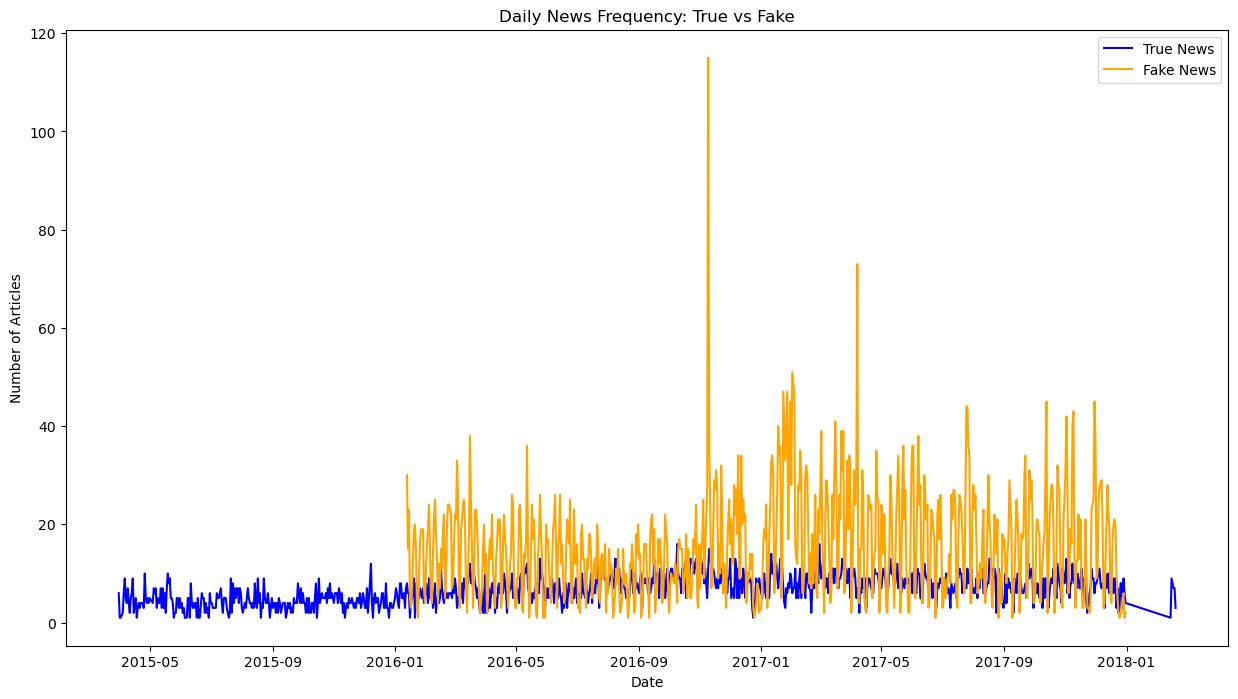

In [69]:
# Convert 'date' column to datetime if not already
politics_data['date'] = pd.to_datetime(politics_data['date'])

# Extract date and label data
daily_counts = politics_data.groupby(['date', 'label']).size().reset_index(name='count')

# Separate true and fake news counts
true_news_counts = daily_counts[daily_counts['label'] == 0]
fake_news_counts = daily_counts[daily_counts['label'] == 1]

# Plot the frequency of true and fake news
plt.figure(figsize=(15, 8))

# Plot True News
sns.lineplot(data=true_news_counts, x='date', y='count', label='True News', color='blue')

# Plot Fake News
sns.lineplot(data=fake_news_counts, x='date', y='count', label='Fake News', color='orange')

# Add titles and labels
plt.title('Daily News Frequency: True vs Fake')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

Hypothesis 8: Difference in Trending Topics

Null Hypothesis (H0): The most common words or topics in fake news articles are not significantly different from those in true news articles.

Alternative Hypothesis (H1): The most common words or topics in fake news articles are significantly different from those in true news articles.

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


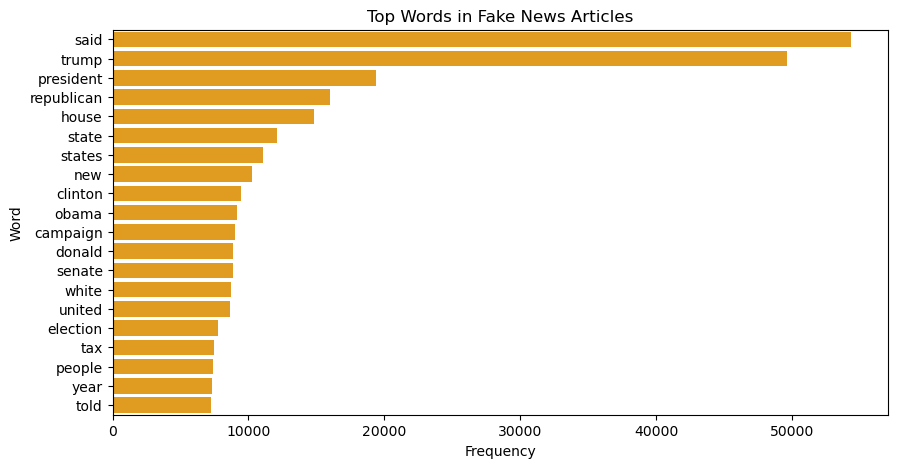

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


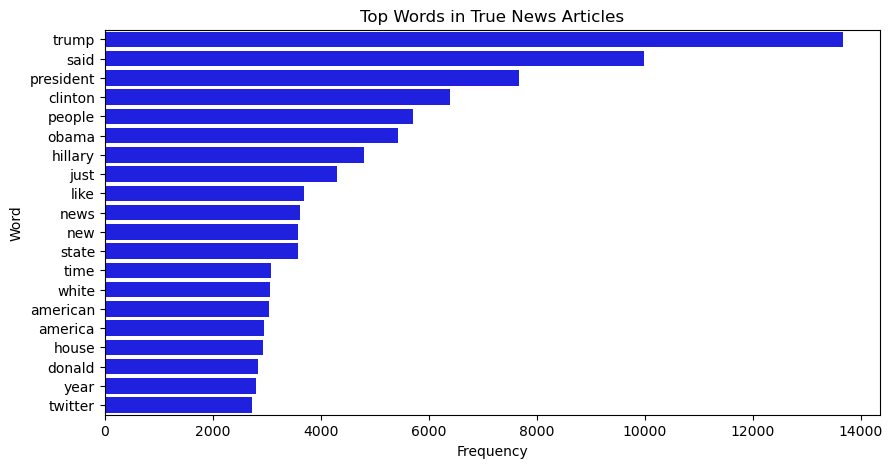

In [70]:
# Get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top words for fake news
fake_news_corpus = politics_data[politics_data['label'] == 1]['text']
top_fake_words = get_top_n_words(fake_news_corpus, 20)

# Get top words for true news
true_news_corpus = politics_data[politics_data['label'] == 0]['text']
top_true_words = get_top_n_words(true_news_corpus, 20)

# Convert to df for visualization
fake_words_df = pd.DataFrame(top_fake_words, columns=['Word', 'Frequency'])
true_words_df = pd.DataFrame(top_true_words, columns=['Word', 'Frequency'])

# Plot top words for fake news
plt.figure(figsize=(10, 5))
sns.barplot(data=fake_words_df, x='Frequency', y='Word', color='orange')
plt.title('Top Words in Fake News Articles')
plt.show()

# Plot top words for true news
plt.figure(figsize=(10, 5))
sns.barplot(data=true_words_df, x='Frequency', y='Word', color='blue')
plt.title('Top Words in True News Articles')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


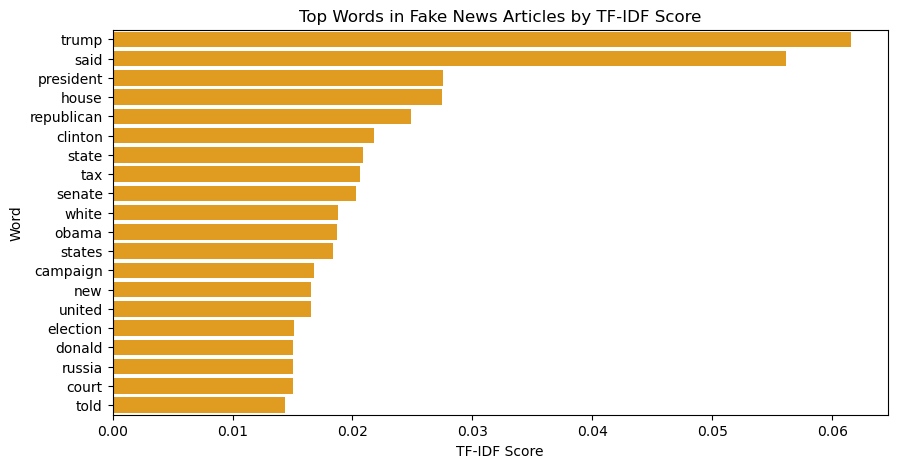

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


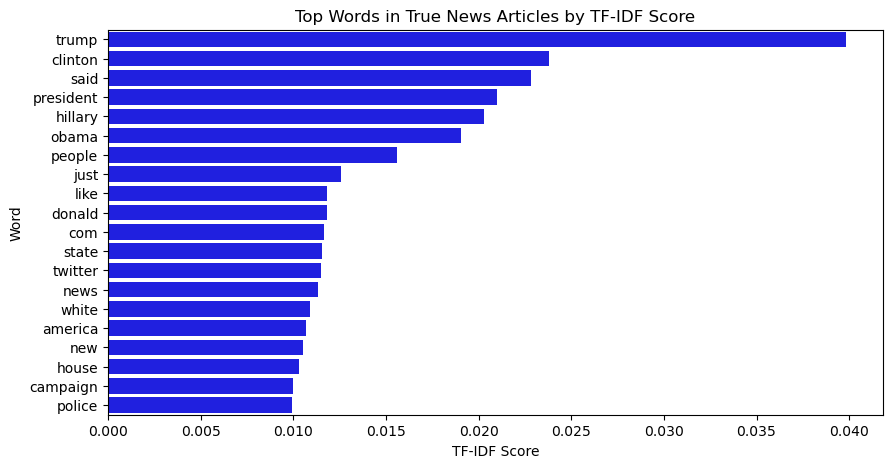

In [71]:
# Function to get top n words with TF-IDF
def get_top_n_words_tfidf(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vec.fit_transform(corpus)
    df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vec.get_feature_names_out())
    mean_tfidf = df_tfidf.mean(axis=0)
    top_words = mean_tfidf.sort_values(ascending=False).head(n)
    return top_words.index.tolist(), top_words.values

# Get top words for fake news with TF-IDF
fake_news_corpus = politics_data[politics_data['label'] == 1]['text']
fake_words, fake_scores = get_top_n_words_tfidf(fake_news_corpus, 20)

# Get top words for true news with TF-IDF
true_news_corpus = politics_data[politics_data['label'] == 0]['text']
true_words, true_scores = get_top_n_words_tfidf(true_news_corpus, 20)

# Convert to df for visualization
fake_words_df = pd.DataFrame({'Word': fake_words, 'TF-IDF Score': fake_scores})
true_words_df = pd.DataFrame({'Word': true_words, 'TF-IDF Score': true_scores})

# Plot top words for fake news with TF-IDF
plt.figure(figsize=(10, 5))
sns.barplot(data=fake_words_df, x='TF-IDF Score', y='Word', color='orange')
plt.title('Top Words in Fake News Articles by TF-IDF Score')
plt.show()

# Plot top words for true news with TF-IDF
plt.figure(figsize=(10, 5))
sns.barplot(data=true_words_df, x='TF-IDF Score', y='Word', color='blue')
plt.title('Top Words in True News Articles by TF-IDF Score')
plt.show()

# FEATURE ENGINEERING

In [72]:
print(politics_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18113 entries, 0 to 18112
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            18113 non-null  object        
 1   text             18113 non-null  object        
 2   subject          18113 non-null  object        
 3   date             18108 non-null  datetime64[ns]
 4   label            18113 non-null  int64         
 5   text_length      18113 non-null  int64         
 6   polarity         18113 non-null  float64       
 7   subjectivity     18113 non-null  float64       
 8   vader_sentiment  18113 non-null  object        
 9   vader_positive   18113 non-null  float64       
 10  vader_negative   18113 non-null  float64       
 11  vader_neutral    18113 non-null  float64       
 12  vader_compound   18113 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 1.8+ MB
None


In [73]:
# Drop rows where 'date' is NaN
politics_data = politics_data.dropna(subset=['date'])

# Verify the change
print(politics_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18108 entries, 0 to 18112
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            18108 non-null  object        
 1   text             18108 non-null  object        
 2   subject          18108 non-null  object        
 3   date             18108 non-null  datetime64[ns]
 4   label            18108 non-null  int64         
 5   text_length      18108 non-null  int64         
 6   polarity         18108 non-null  float64       
 7   subjectivity     18108 non-null  float64       
 8   vader_sentiment  18108 non-null  object        
 9   vader_positive   18108 non-null  float64       
 10  vader_negative   18108 non-null  float64       
 11  vader_neutral    18108 non-null  float64       
 12  vader_compound   18108 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 1.9+ MB
None


Combine Title and Text Columns

In [74]:
# Combine title and text into a single column
politics_data['title_text'] = politics_data['title'] + " " + politics_data['text']

Define and Apply Text Cleaning Function

In [75]:
# Text cleaning function
def text_cleaner(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove square brackets and their contents
    text = re.sub('\[.*?\]', '', text)
    # Replace non-word characters with a space
    text = re.sub("\\W", " ", text)
    # Remove URLs or website addresses
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove punctuation marks
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove newline characters
    text = re.sub('\n', '', text)
    # Remove alphanumeric words containing digits
    text = re.sub('\w*\d\w*', '', text)
    # Expand contractions 
    text = contractions.fix(text)
    # Remove stopwords and perform lemmatization
    stopwords_set = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords_set]
    return " ".join(tokens)

# Apply text cleaning function to the combined column
politics_data['title_text'] = politics_data['title_text'].apply(text_cleaner)

Prepare Data for Feature Engineering

In [76]:
# Define the df for model training
data_model = politics_data[["title_text", "label"]]

Vectorize Text Data with TF-IDF

In [77]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data_model['title_text'])

# Convert TF-IDF matrix to df
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add TF-IDF features to the original df
data_model = pd.concat([data_model.reset_index(drop=True), tfidf_df], axis=1)

In [78]:
data_model.head()

,title_text,label,abandon,abandoned,abbott,abc,abdullah,abe,abedin,ability,...,young,younger,youth,youtu,youtube,yr,zero,zika,zinke,zone
0,democrat senator warns mueller release finding...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,msnbc anchor flabbergasted texas teacher prote...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,watch snowflake asked communist party platform...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,badass general john kelly shoved chinese secur...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,doj jeff session open investigation fbi told f...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


HANDLE IMBALANCED DATASET

In [79]:
print(data_model.columns)

Index(['title_text', 'label', 'abandon', 'abandoned', 'abbott', 'abc',
       'abdullah', 'abe', 'abedin', 'ability',
       ...
       'young', 'younger', 'youth', 'youtu', 'youtube', 'yr', 'zero', 'zika',
       'zinke', 'zone'],
      dtype='object', length=5002)


In [80]:
print(data_model['label'].head())

   label  label
0      0    0.0
1      0    0.0
2      0    0.0
3      0    0.0
4      0    0.0


In [81]:
print(data_model.dtypes)

title_text     object
label           int64
abandon       float64
abandoned     float64
abbott        float64
               ...   
yr            float64
zero          float64
zika          float64
zinke         float64
zone          float64
Length: 5002, dtype: object


In [82]:
print(data_model.columns[data_model.columns.duplicated()].tolist())

['label']


In [83]:
data_model = data_model.loc[:, ~data_model.columns.duplicated()]

In [84]:
print(data_model['label'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64


In [85]:
print(data_model['label'].apply(lambda x: isinstance(x, (int, float))).value_counts())

label
True    18108
Name: count, dtype: int64


In [86]:
# Check if there are any unique values in the 'label' column
unique_labels = data_model['label'].unique()
print("Unique labels:", unique_labels)

Unique labels: [0 1]


In [87]:
# Check the distribution of values in the 'label' column
label_counts = data_model['label'].value_counts()
print("Label counts:", label_counts)

Label counts: label
1    11272
0     6836
Name: count, dtype: int64


Resampling Techniques

In [88]:
# Define features and target
X = data_model.drop(columns=['label'])  
y = data_model['label']  

# Convert categorical features to numeric
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Handle missing values
imputer = SimpleImputer(strategy='mean') 
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check data types and unique values in the target variable
print("Target variable type:", y_train.dtype)
print("Unique values in target variable:", y_train.unique())

# Check distribution of target variable in training set
print("Original class distribution in training set:")
print(y_train.value_counts())

# a. Oversampling the Minority Class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# b. Undersampling the Majority Class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print("Class distribution after Random Undersampling:")
print(pd.Series(y_resampled).value_counts())

# c. Combined SMOTE + RandomUndersampler
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
print("Class distribution after SMOTE + ENN:")
print(pd.Series(y_resampled).value_counts())

Target variable type: int64
Unique values in target variable: [0 1]
Original class distribution in training set:
label
1    7879
0    4796
Name: count, dtype: int64
Class distribution after SMOTE:
label
0    7879
1    7879
Name: count, dtype: int64
Class distribution after Random Undersampling:
label
0    4796
1    4796
Name: count, dtype: int64
Class distribution after SMOTE + ENN:
label
0    5414
1    4963
Name: count, dtype: int64


In [89]:
"""
Chose SMOTE + ENN for its balance between oversampling and noise reduction
"""

'\nChose SMOTE + ENN for its balance between oversampling and noise reduction\n'

In [90]:
# Save the DataFrame to a CSV file
data_model.to_csv('data_model.csv', index=False)